## Final Project Submission

Please fill out:
* Student name: Lynn Achieng Oloo
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Maryann Mwikali
* Blog post URL:


In [ ]:
#relationship between language and vote_average
#genre vs average rating
#production budget vs domestic gross vs worldwide gross
#popularity by month


In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
movies = pd.read_csv('zippedData/tmdb.movies.csv/tmdb.movies.csv',index_col = 0)
movies

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [7]:
movie_budget = pd.read_csv('zippedData/tn.movie_budgets.csv/tn.movie_budgets.csv',index_col = 0)
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"


In [5]:
conn = sqlite3.Connection("zippedData/im.db/im.db")

In [6]:
q1 = """
SELECT *
FROM movie_basics
JOIN movie_ratings
USING (movie_id)
JOIN directors
USING (movie_id)
;
"""

pd.read_sql(q1, conn)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,person_id
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540
1,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540
2,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540
3,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77,nm0712540
4,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43,nm0002411
...,...,...,...,...,...,...,...,...,...
181384,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859
181385,tt9914642,Albatross,Albatross,2017,NaN,Documentary,8.5,8,nm5300859
181386,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653
181387,tt9914942,La vida sense la Sara Amat,La vida sense la Sara Amat,2019,NaN,None,6.6,5,nm1716653


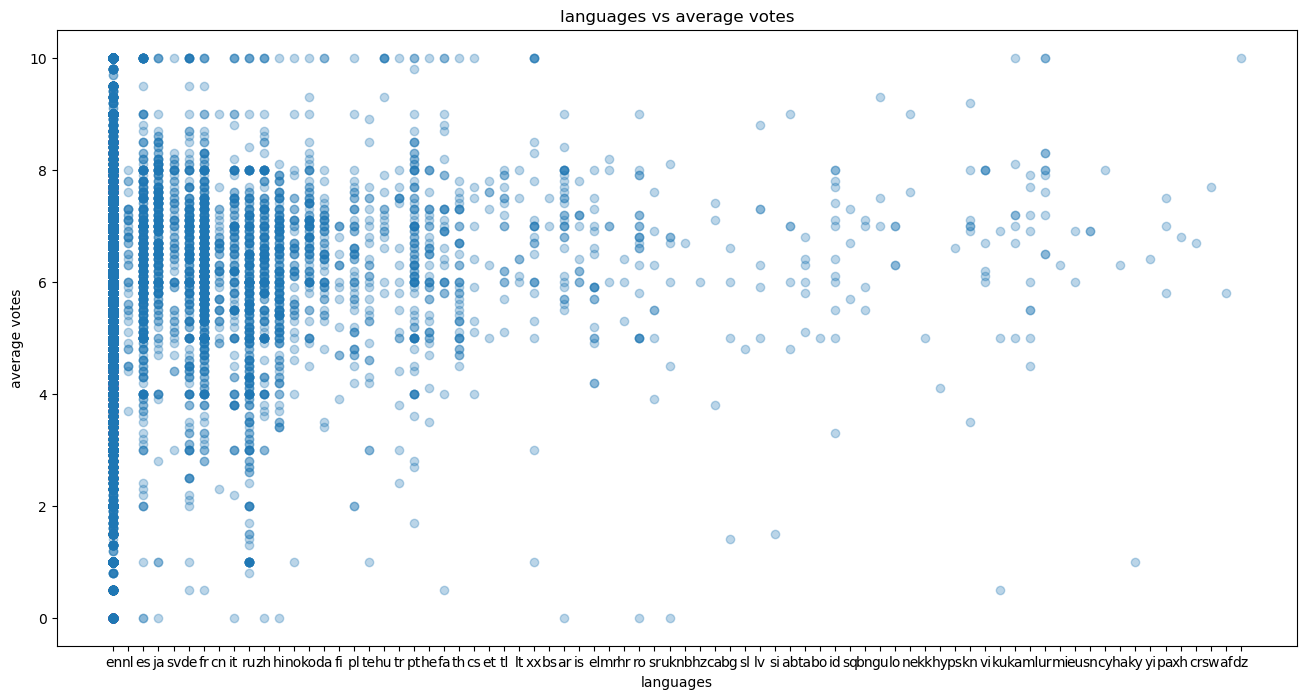

In [8]:
# Run this cell without changes

fig, ax = plt.subplots(figsize=(16, 8))

ax.scatter(
    x=movies["original_language"], y=movies["vote_average"], alpha=0.3
)

ax.set_xlabel("languages")
ax.set_ylabel("average votes")
ax.set_title("languages vs average votes");